## ***Домашняя работа №2***

***Данная работа посвящена анализу табличных данных с использованием библиотек Pandas и Matplotlib. Включает загрузку данных, проверку качества (пропуски, дубликаты), базовый exploratory analysis (группировки, агрегаты) и визуализацию (гистограммы, боксплоты, scatter plot).***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('S02-hw-dataset.csv')

print("Первые строки датасета:")
print(df.head())

Первые строки датасета:
   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296


In [3]:
print("\nИнформация о датасете:")
print(df.info())


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None


In [4]:
print("\nОписательные статистики:")
print(df.describe())


Описательные статистики:
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000   24.000000   3.000000   432.000000
50%    20.000000   33.000000   5.000000   693.000000
75%    30.000000   45.500000   7.000000  1115.000000
max    40.000000  120.000000  11.000000  2475.000000


In [5]:
# Пропуски и дубликаты
print("\Количество пропусков по столбцам:")
print(df.isna().sum())

print("\nКоличество полных дубликатов:", df.duplicated().sum())

\Количество пропусков по столбцам:
user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

Количество полных дубликатов: 1


In [6]:
print("Количество объектов, возраст которых указан вне диапазона 18-100 (не включая nan):", ((df['age'] < 18) | (df['age'] > 100)).sum())
print("Это значения: ", end="")
print(*df[~df['age'].between(18, 100)]['age'].unique()[1:], sep=", ")

Количество объектов, возраст которых указан вне диапазона 18-100 (не включая nan): 2
Это значения: 120.0, 5.0


In [7]:
print("Количество отрицательных значений purchases:", (df['purchases'] < 0).sum())
print("Количество раз, когда указан нулевой доход при ненулевых количествах покупок:", ((df['revenue'] == 0) & (df['purchases'] != 0)).sum())

Количество отрицательных значений purchases: 1
Количество раз, когда указан нулевой доход при ненулевых количествах покупок: 1


***В данных обнаружено несколько проблем качества. Во-первых, присутствуют пропуски в столбце возраста (2 пропущенных значения) и один полный дубликат строки. Также выявлены аномальные значения возраста: два пользователя имеют некорректный возраст (5 и 120 лет), выходящий за разумные границы 18-100 лет.***

***Во-вторых, обнаружены логические несоответствия в бизнес-показателях: имеется одно отрицательное значение количества покупок, что невозможно в реальности, а также один случай, когда при ненулевых покупках указан нулевой доход, что противоречит бизнес-логике. Эти проблемы требуют очистки перед дальнейшим анализом.***

In [8]:
print("Частота встречаемости стран в датасете:")
df["country"].value_counts()

Частота встречаемости стран в датасете:


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [9]:
print(f"\nГруппировка по country (среднее, сумма и количество по age):")
df.groupby("country")["age"].agg(['mean', 'sum', 'count'])


Группировка по country (среднее, сумма и количество по age):


,mean,sum,count
country,,,
CN,24.000000,48.0,2
DE,34.600000,173.0,5
FR,46.250000,555.0,12
RU,30.076923,391.0,13
US,36.714286,257.0,7


In [10]:
print(f"\nГруппировка по country (среднее, сумма и количество по purchases):")
df.groupby("country")["purchases"].agg(['mean', 'sum', 'count'])


Группировка по country (среднее, сумма и количество по purchases):


,mean,sum,count
country,,,
CN,4.500000,9,2
DE,6.500000,39,6
FR,4.250000,51,12
RU,4.769231,62,13
US,4.625000,37,8


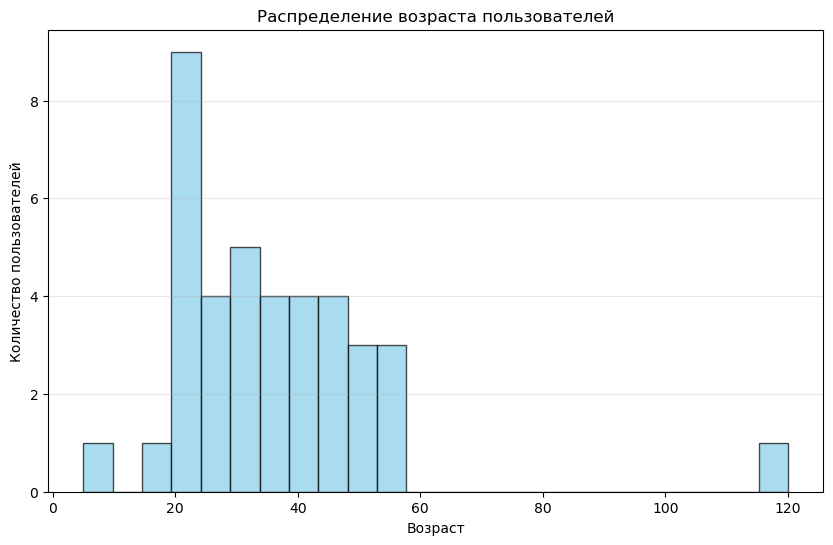

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=24, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.title('Распределение возраста пользователей')
plt.grid(axis='y', alpha=0.3)

plt.savefig('figures/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

***Гистограмма показывает распределение возрастов пользователей. Можно заметить, что большинство пользователей сосредоточены в возрастной группе 20-55 лет, с пиком в районе 20-25 лет. Распределение имеет правый хвост, что указывает на наличие пользователей старшего возраста или аномальных данных.***

<Figure size 1200x600 with 0 Axes>

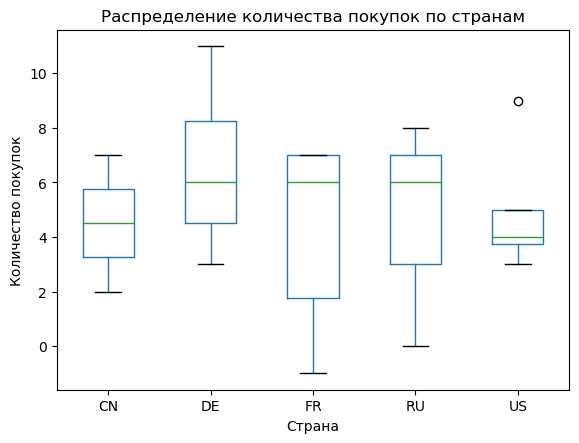

In [12]:
plt.figure(figsize=(12, 6))
df.boxplot(column='purchases', by='country', grid=False)
plt.xlabel('Страна')
plt.ylabel('Количество покупок')
plt.title('Распределение количества покупок по странам')
plt.suptitle('')

plt.savefig('figures/purchases_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

***Германия (DE), Франция (FR) и Россия (RU) демонстрируют самые высокие медианные значения покупок, также они имеют наибольший разброс данных. В данных присутствуют выбросы, особенно заметен один такой выброс для США (US).***

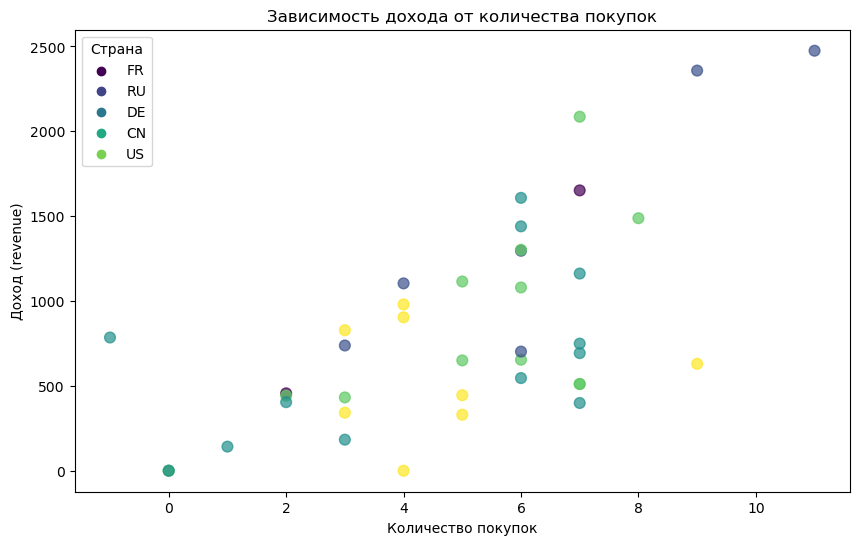

In [13]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(df['purchases'], df['revenue'], c=df['country'].astype('category').cat.codes, 
                     cmap='viridis', alpha=0.7, s=60)
plt.xlabel('Количество покупок')
plt.ylabel('Доход (revenue)')
plt.title('Зависимость дохода от количества покупок')

countries = df['country'].unique()
for i, country in enumerate(countries):
    plt.scatter([], [], c=[plt.cm.viridis(i/len(countries))], label=country)
plt.legend(title='Страна')

plt.savefig('figures/revenue_vs_purchases.png', dpi=300, bbox_inches='tight')
plt.show()

***Диаграмма рассеяния показывает ожидаемую положительную корреляцию между количеством покупок и доходом - чем больше покупок, тем выше доход. Однако интересно отметить, что для одинакового количества покупок доход может значительно варьироваться, что может указывать на различия в стоимости товаров или стратегиях ценообразования в разных странах.***